In [15]:
import utfc.SoundF as sf
import numpy as np
import matplotlib.pyplot as plt
import libnum
import random
import torchaudio as ta
import base64
import tqdm

hf = [1209, 1336, 1477, 1633]
lf = [697, 770, 852, 941]
kb = [['1', '2', '3', 'A'], ['4', '5', '6', 'B'], ['7', '8', '9', 'C'], ['E', '0', 'F', 'D']]
'''
 *=e #=f
'''
def chr2fm(c:str):
    for i in range(4):
        l = kb[i]
        for j in range(4):
            if l[j] == c :
                return hf[j]*5,lf[i]*5
    return None
# ch=0
# x = sf.WavF('z:/ctf/girlfriend.wav')
# xw = x.waveData[ch]/np.max(x.waveData[ch])
# win=x.framerate//10
# l=[]
# for i in range(0,len(xw),win ):
#     fft = np.abs(np.fft.fft(x.waveData[ch][i:i+win]))[:win//2]
#     l.append([fft])
# npfft = np.concatenate(l[:-1])
# max = np.max(npfft,0)
# plt.plot(max[:100])
#
# np.where(max > 0), 941/20
import base64

In [17]:
fn='z:/ctf/flag.wav'
fo ='z:/ctf/1.wav'
x = ta.load(fo)
datao = (x[0][0].numpy()*25000).astype(np.int16)
framerate = x[1]

flaghex = '356f6952354c757336594f3935706976354c69413537366b355a796f354c69573535574d35357145364b6553364a43393659654d3737794d356f756c356f71783535324135344f743534697835357145354c71363434434343756159722b5334674f652b704f5763714f576b702b576b6d756156734f533675756563764f533472652b386a4f6d69682b61597675575070756578752b6561684f692b756565386d4f53367567726b7535626b75367a6b7549336c6c707a6d724b4c7676497a6b7535626b75367a6b7549336e6b49626f7036507676497a6b7535626b75367a6b7549336d68344c6c7670666a6749494b36594b6a3737794d354c694f356f6952354c325635626d793434434343755777736557446a2b4f4169756572706569766e656d56683142736458506a6749767068347a706e614c6d6e496e6b7549446c6a36586d72597a6f7234336c6a36766c675a7269674a7a6d694a486f7237546d694a486d7371486d6e496e6c6e5a726d6a49487676497a6c6d36446b754c726c6c707a6d724b4c7676497a6d6959446b7536586c7636766b755a4469674a336a6749494b356f7152356f69573434434b354c696336594b71364b572f35712b533434434c3659654d3571796e365a697a365a534c364b2b3035357145346f436335712b50354c6971354c713636594f39354c7961355a3261356f7942364965713562657835357145354c2b6835622b313737794d355a796f35596972354c71363535794c3570326c3570697635725771364c533535706532365a65303737794d3561573535593230364b654a35623658356236493659654e364b6142346f43643434434343756977714f57416e2b5334674f6d6d6c756941676561746a4f2b386a4f654d727565376d652b386a4f614a674f61636965532b6e656545747561636965614a674f57576e4f61736f752b386a4f61636965614a674f65447265654973656561684f6163692b5750692b5337724f4f416767726f76356e6b754b726b754a626e6c597a7676497a6c6d36446b754c726b7661446b75367a7676497a6d6d4c376c7670666b754933706771506b75596a6b75592f6c6b624d4b5933526d633268766433744258334e70625842735a56396e61575a3058335276583246736247313558325a79615756755a484e66596e6c66544739325a584a7365555a766548304b35624350356243503535714535706558364b2b743737794d357069763570326c36496571364a434d35706177365a692f35347534353571453536533835346d703434434343755763714f53346c75533675756561684f5747742b6563764f533472652b386a4f53346a7553396f4f5337724f6562754f5338744f2b386a4f65636e2b576c76654f416767726e694c486d694a486d6959446e694c487676497a6d7261546e6c4a2f6d6c36446d6770513d'.upper()
wavNum=[]
def creat_wave(f=1,tim=1,framerate=44100,max=200,start=0):
    dr = np.pi*2*f/framerate
    r=0
    return   [int(np.sin(r+i*dr)*max) for i in range(start,start+int(framerate*tim)) ]
wh =[]
wl= []
jg = framerate //20
for i in tqdm.tqdm(flaghex):
    f1,f2= chr2fm(i)
    tim=0.1
    wh.extend([0]*jg)
    wh.extend(creat_wave(f1,tim,framerate,start=len(wh)))
    wl.extend([0]*jg)
    wl.extend(creat_wave(f2,tim,framerate,start=len(wh)))

for i in tqdm.trange(len(wh)):
    wh[i] = wh[i]+wl[i]+datao[i%len(datao)]
sf.CreateWav(fn,wh,framerate,1)


100%|██████████| 2088/2088 [00:19<00:00, 108.10it/s]


13812120 13812120


In [24]:
hf = [i//2 for i in [1209, 1336, 1477, 1633]]
lf = [i // 2 for i in [697, 770, 852, 941]]
kb = [['1', '2', '3', 'A'], ['4', '5', '6', 'B'], ['7', '8', '9', 'C'], ['E', '0', 'F', 'D']]

x = ta.load('z:/ctf/flag.wav')
datao = (x[0][0].numpy())
framerate = x[1]
df = int(framerate*0.15)
strflag = ''
for i in range(0,len(datao),df):
    wave = datao[i+df//3: i+df]
    ffta =  np.abs(np.fft.fft(wave))
    lmax = ffta[lf]
    lindx = np.where(lmax==lmax.max())[0][0]
    hmax = ffta[hf]
    hindx = np.where(hmax==hmax.max())[0][0]
    strflag+=kb[lindx][hindx]
c=int(strflag,16)
c = libnum.n2s(c)
b = b''
for i in range(0,len(c),4):
    try:
        b+=base64.b64decode(c[i:i+4])
    except:
        b+=b'\xee\xee\xee'
print(strflag)
with open('z:/ctf/x.txt','wb') as f:
    f.write(b)
print(b.decode())

356F6952354C757336594F3935706976354C69413537366B355A796F354C69573535574D35357145364B6553364A43393659654D3737794D356F756C356F71783535324135344F743534697835357145354C71363434434343756159722B5334674F652B704F5763714F576B702B576B6D756156734F533675756563764F533472652B386A4F6D69682B61597675575070756578752B6561684F692B756565386D4F53367567726B7535626B75367A6B7549336C6C707A6D724B4C7676497A6B7535626B75367A6B7549336E6B49626F7036507676497A6B7535626B75367A6B7549336D68344C6C7670666A6749494B36594B6A3737794D354C694F356F6952354C325635626D793434434343755777736557446A2B4F4169756572706569766E656D56683142736458506A6749767068347A706E614C6D6E496E6B7549446C6A36586D72597A6F7234336C6A36766C675A7269674A7A6D694A486F7237546D694A486D7371486D6E496E6C6E5A726D6A49487676497A6C6D36446B754C726C6C707A6D724B4C7676497A6D6959446B7536586C7636766B755A4469674A336A6749494B356F7152356F69573434434B354C696336594B71364B572F35712B533434434C3659654D3571796E365A697A365A534C364B2B3035357145346F436335712B50354C6971354C713636594F39354C7961

In [26]:
import matplotlib.pyplot as plt ,libnum,  torchaudio as ta,base64,numpy as np
hf = [i//2 for i in [1209, 1336, 1477, 1633]]
lf = [i // 2 for i in [697, 770, 852, 941]]
kb = [['1', '2', '3', 'A'], ['4', '5', '6', 'B'], ['7', '8', '9', 'C'], ['E', '0', 'F', 'D']]

x = ta.load('z:/ctf/ctfshow.wav')
datao = (x[0][0].numpy())
framerate = x[1]
df = int(framerate*0.15)
strflag = ''
for i in range(0,len(datao),df):
    wave = datao[i+df//3: i+df]
    ffta =  np.abs(np.fft.fft(wave))
    lmax = ffta[lf]
    lindx = np.where(lmax==lmax.max())[0][0]
    hmax = ffta[hf]
    hindx = np.where(hmax==hmax.max())[0][0]
    strflag += kb[lindx][hindx]
    # print( kb[lindx][hindx],end='')
    # plt.clf()
    # plt.plot(ffta[300:900])
    # plt.pause(0.02)
import re
flag = base64.b64decode(libnum.n2s(int(strflag,16))).decode().replace('ctfshow{Easy_DTMF_for_all_my_friends_by_LoveryFox}','flag{test}')
print(flag)


我们都是一群在世界的角落里，拥抱着热爱的人。
是一群在大多数人眼中，颇显另类的边缘人
他们不喜欢，他们不理解，他们不懂得。
那，与我何干。
就像《童话镇Plus》里面有一句歌词叫做“我说我没有坚持，因为喜欢，所以快乐”。
抑或《东邪西毒》里欧阳锋说的“每个人都会坚持自己的信念，在别人看来是浪费时间，她却觉得很重要”。
谨借一首老歌，献给，所有依然有所喜欢，有所热爱的朋友们。
这个世界，因为你们，显得不那么乏味
ctfshow{A_simple_gift_to_allmy_friends_by_LoverlyFox}
小小的旗语，是来自萌新阿狸的礼物。
在世人的冷眼中，与你们相伴，真好。
爱我所爱，此生无悔


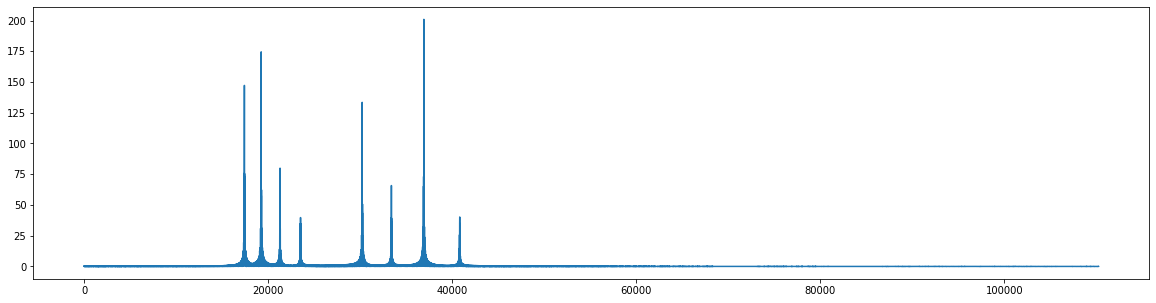

In [34]:
import torchaudio as ta,numpy as np, matplotlib.pyplot as plt
x = ta.load('z:/ctf/ctfshow.wav')
datao = (x[0][0].numpy())
framerate = x[1]
wav=datao[(4*60+30)*framerate:(4*60+35)*framerate]
fft = np.abs(np.fft.fft(wav))
plt.figure(figsize=(20,5))
plt.plot(fft[:len(fft)//2])